<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/AM_T1_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Predição de pagamento de empréstimos (2 pts)

Uma instituição financeira (fictícia) possui uma base de dados com o histórico de crediário oferecido aos seus clientes. Baseado neste histórico, a instituição deseja investigar a criação de modelos de classificação para inferir se um novo cliente que submeteu uma requisição de empréstimo pagará ou não a dívida, caso o banco resolva realizar esse empréstimo. O objetivo é predizer se um novo cliente pagaria ou não uma dívida contraída, tendo como base as características desse novo cliente. Uma vez treinado, um modelo de classificação para esse problema poderá inferir se um novo cliente irá ou não honrar um eventual empréstimo concedido a ele.

O conjunto de dados a ser utilizado para treinamento possui 1500 exemplos, e contém dados relativos a créditos (empréstimos) concedidos aos clientes da instituição financeira. Esses registros estão contidos no arquivo credtrain.txt. É também fornecido um conjunto de exemplos de teste no arquivo credtest.txt. Para cada cliente, são definidos 11 atributos (variáveis preditoras). Além disso, a última coluna de cada arquivo informa se o cliente honrou ou não o pagamento do empréstimo. Na Tabela 1, encontramos a descrição dos atributos.

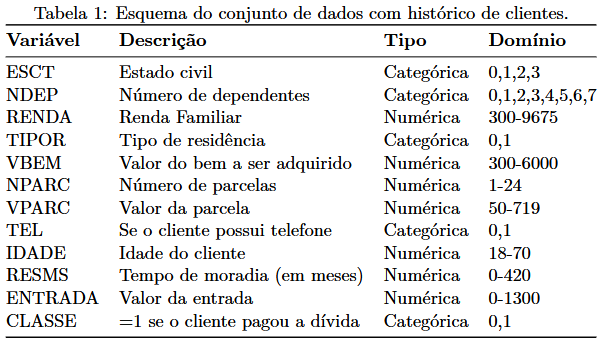

Antes de iniciar o treinamento, é preciso realizar diversos passos de pré-processamento sobre esses dados. Alguns aspectos que você deve levar em contar na sua solução:

- Esse conjunto de dados contém diversos atributos que são categóricos. Modelos de AM não podem ser treinados no Scikit-Learn sobre atributos cujos valores são cadeias de caracteres. Sendo assim, você deve tomar providências para codificar numericamente esses atributos de maneira apropriada.

- Dentre os atributos numéricos, há uma grande discrepância entre as suas respectivas faixas de valores. É sabido que diferenças grandes entre as faixas de valores dos atributos numéricos pode atrapalhar o processo de treinamento de alguns algoritmos de AM.

Após realizar os passos de pré-processamento adequados, você deve criar modelos de classificação por meio dos algoritmos de aprendizado de máquina implementados nas seguintes classes da biblioteca Scikit-Learn. (Por simplicidade, você pode manter os valores default dos hiperparâmetros de cada algoritmo.)

1. sklearn.linear_model.LogisticRegression
2. sklearn.neighbors.KNeighborsClassifier
3. sklearn.ensemble.GradientBoostingClassifier

Construa um gráfico que apresenta a curva ROC para os três algoritmos acima. Use algum dos critérios de escolha de limiar apresentado em aula para definir o limiar de classificação para cada um desses algoritmos.
Após o treinamento e a escolha de limiares adequados, você deve avaliar a qualidade preditiva dos modelos correspondentes. Para isso, você deve usar os exemplos do conjunto de teste.
Isso permitirá que você avalie o quão efetivo foi o passo de treinamento dos modelos, ou seja, qual o poder preditivo de cada modelo de classificação.

- Produza a matriz de confusão (confusion matrix) relativa aos resultados da fase de testes para cada modelo.
- Apresente também o relatório produzido pela função classification_report do Scikit-Learn.

In [601]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/credtrain.txt", sep="\t")
df_train, df_val = train_test_split(df_train, test_size=0.2)
df_test = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/credtest.txt", sep="\t")

colunas = ["ESCT","NDEP","RENDA","TIPOR","VBEM","NPARC","VPARC","TEL","IDADE","RESMS","ENTRADA","CLASSE"]
df_train.columns = colunas
df_test.columns = colunas
df_val.columns = colunas

df_train.head(-5)

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
1037,0,0,2000,1,590,4,129,0,36,6,150,0
906,1,0,1000,0,496,2,269,0,36,48,0,1
182,0,0,1200,0,458,10,71,0,52,12,0,1
404,0,0,400,1,511,10,78,0,28,6,0,0
925,1,0,300,0,440,5,89,0,36,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
334,1,0,300,0,558,12,76,1,40,48,0,1
932,1,0,1674,1,558,10,84,0,43,6,0,1
1455,0,0,1200,1,355,10,54,0,41,6,0,1
1318,0,0,1428,0,389,6,82,0,67,48,0,0


**Os atributos categóricos já estão codificados! Mas precisamos tratar os numéricos, a faixa dos valores são muito discrepantes.**

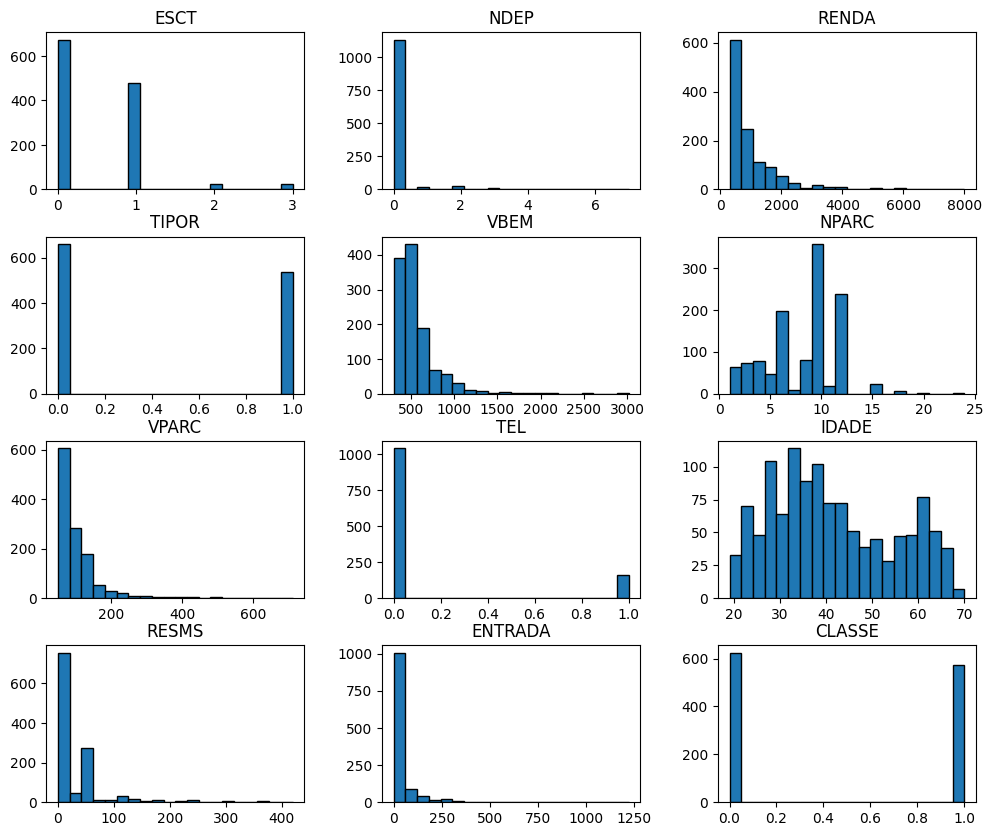

In [602]:
import matplotlib.pyplot as plt
df_train.hist(figsize=(12,10), edgecolor="black", grid=False, bins=20)
plt.show()

As features VPARC (Valor da Parcela), RENDA, VBEM (Valor do bem), RESMS (Tempo de Moradia) e ENTRADA estão **assimétricas à direita**, podem ser escaladas utilizando **Log Transform**.

As features IDADE e NPARC **parecem se aproximar de uma normal**, aplicaremos um **teste de normalidade**, se passar, podemos efetuar **Standardization**.



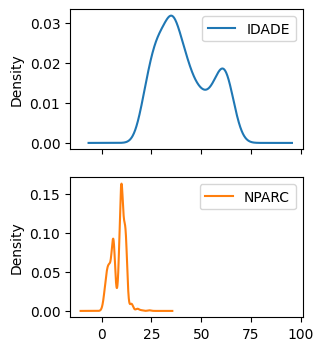

In [603]:
from seaborn import displot
# Testando os atributos "normais"
df_train_normaltest = df_train[["IDADE","NPARC"]].copy()
df_train_normaltest.plot(kind="kde",subplots=True,figsize=(3,4))
plt.show()

Nenhum teste mostrou normalidade, as features também não apresentam muitos outliers para aplicar RobustScaling. Portanto, utilizaremos o **MinMaxScaling**.

In [604]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_train[["IDADE","NPARC"]])

def tratar_dados(data):
  # Tratando os atributos minmax
  df_minmax = data[["IDADE", "NPARC"]].copy()
  df_minmax[["IDADE", "NPARC"]] = scaler.transform(df_minmax[["IDADE", "NPARC"]])

  # Tratando os atributos "skewed"
  df_logT = data[["VPARC","RESMS","RENDA","ENTRADA","VBEM"]].copy()
  df_logT = np.log1p(df_logT)

  # Criando o df_scaled
  df_scaled = data.copy()
  df_scaled[["VPARC","RESMS","RENDA","ENTRADA","VBEM"]] = df_logT
  df_scaled[["IDADE", "NPARC"]] = df_minmax
  return df_scaled

df_train_scaled = tratar_dados(df_train)
df_val_scaled = tratar_dados(df_val)
df_test_scaled = tratar_dados(df_test)

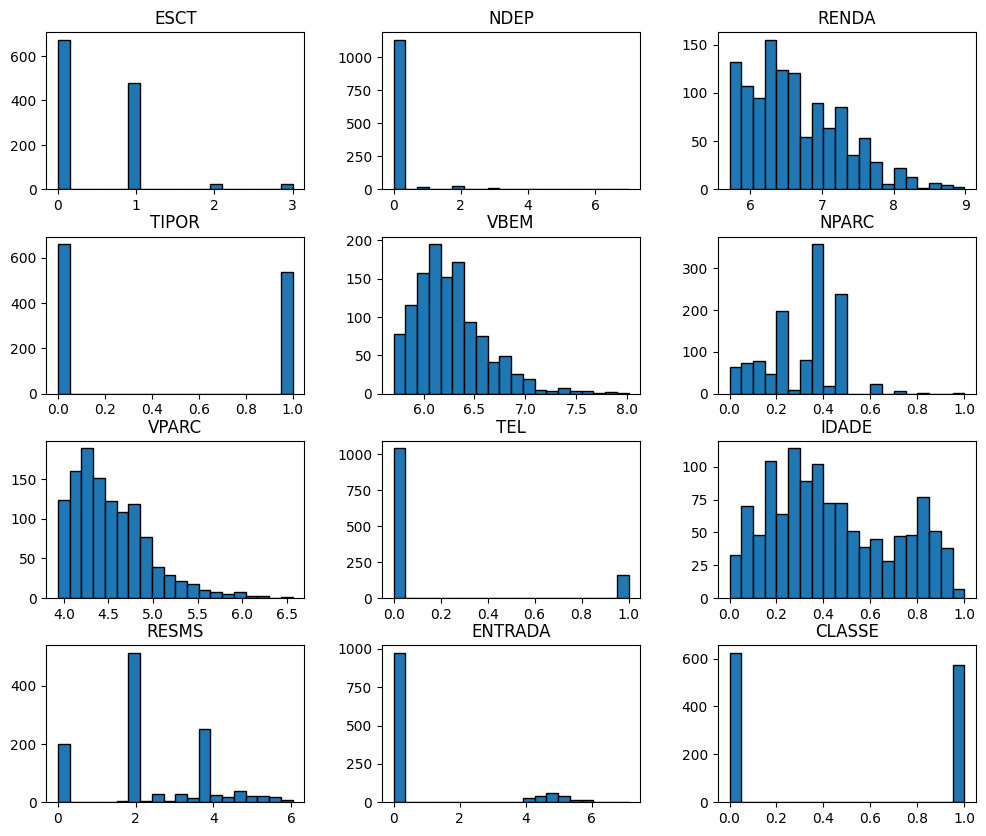

In [605]:
df_train_scaled.hist(figsize=(12,10), edgecolor="black", grid=False, bins=20)
plt.show()

OK! Todos os atributos escalados de maneira correta. Nosso dataset não parece ser desbalanceado.

In [606]:
print((df_train["CLASSE"] == 1).sum(), (df_train["CLASSE"] == 0).sum())
print((df_val["CLASSE"]==1).sum(), (df_val["CLASSE"]==0).sum())
print((df_test["CLASSE"] == 1).sum(), (df_test["CLASSE"] == 0).sum())

574 625
140 160
271 305


In [607]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# instanciando modelos com hiperparâmetros default.
logreg = LogisticRegression()
knnc = KNeighborsClassifier()
gradc = GradientBoostingClassifier()

# realizando o two way holdout.
X_train = df_train_scaled.drop("CLASSE", axis=1)
y_train = df_train["CLASSE"]

X_val = df_val_scaled.drop("CLASSE", axis=1)
y_val = df_val["CLASSE"]

X_test = df_test_scaled.drop("CLASSE", axis=1)
y_test = df_test_scaled["CLASSE"]

# treinando os modelos.
logreg.fit(X_train, y_train)
knnc.fit(X_train, y_train)
gradc.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

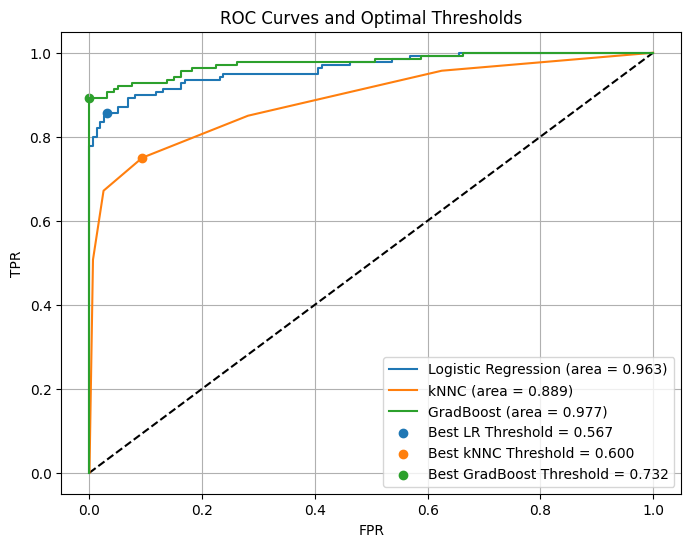

In [608]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

# Saídas de probabilidade
y_pred_prob_log = logreg.predict_proba(X_val)[:, 1]
y_pred_prob_knnc = knnc.predict_proba(X_val)[:, 1]
y_pred_prob_gradc = gradc.predict_proba(X_val)[:, 1]

# Taxas FPR e TPR + limiares (ROC)
FPR_log, TPR_log, thresholds_log = roc_curve(y_val, y_pred_prob_log)
FPR_knnc, TPR_knnc, thresholds_knnc = roc_curve(y_val, y_pred_prob_knnc)
FPR_gradc, TPR_gradc, thresholds_gradc = roc_curve(y_val, y_pred_prob_gradc)

# Melhor threshold - Logistic Regression
J_log = TPR_log - FPR_log
idx_log = J_log.argmax()
t_log = thresholds_log[idx_log]
best_TPR_log = TPR_log[idx_log]
best_FPR_log = FPR_log[idx_log]

# Melhor threshold - kNNC
J_knnc = TPR_knnc - FPR_knnc
idx_knnc = J_knnc.argmax()
t_knnc = thresholds_knnc[idx_knnc]
best_TPR_knnc = TPR_knnc[idx_knnc]
best_FPR_knnc = FPR_knnc[idx_knnc]

# Melhor threshold - Gradient Boosting
J_gradc = TPR_gradc - FPR_gradc
idx_gradc = J_gradc.argmax()
t_grad = thresholds_gradc[idx_gradc]
best_TPR_grad = TPR_gradc[idx_gradc]
best_FPR_grad = FPR_gradc[idx_gradc]

# AUC
ROC_AUC_log = auc(FPR_log, TPR_log)
ROC_AUC_knnc = auc(FPR_knnc, TPR_knnc)
ROC_AUC_gradc = auc(FPR_gradc, TPR_gradc)

# Plotando as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR_log, TPR_log, label=f'Logistic Regression (area = {ROC_AUC_log:.3f})')
plt.plot(FPR_knnc, TPR_knnc, label=f'kNNC (area = {ROC_AUC_knnc:.3f})')
plt.plot(FPR_gradc, TPR_gradc, label=f'GradBoost (area = {ROC_AUC_gradc:.3f})')

# Melhores thresholds
plt.scatter(best_FPR_log, best_TPR_log, marker='o', label=f'Best LR Threshold = {t_log:.3f}')
plt.scatter(best_FPR_knnc, best_TPR_knnc, marker='o', label=f'Best kNNC Threshold = {t_knnc:.3f}')
plt.scatter(best_FPR_grad, best_TPR_grad, marker='o', label=f'Best GradBoost Threshold = {t_grad:.3f}')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves and Optimal Thresholds')
plt.legend(loc='best')
plt.grid()
plt.show()


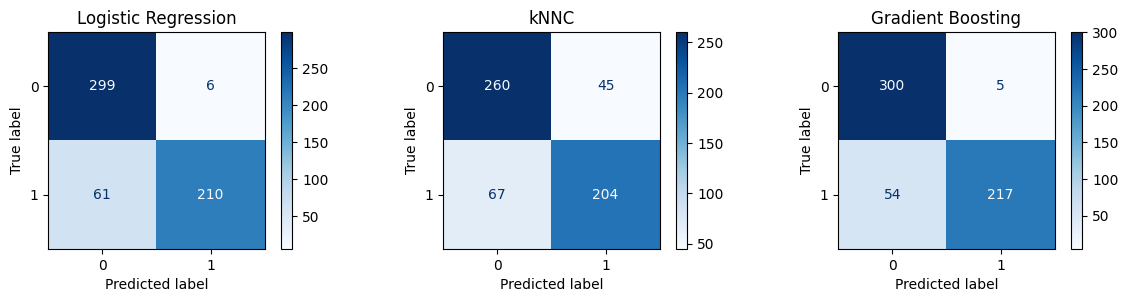

In [609]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Saídas de probabilidade para o conjunto de teste
y_pred_prob_log_test = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_knnc_test = knnc.predict_proba(X_test)[:, 1]
y_pred_prob_gradc_test = gradc.predict_proba(X_test)[:, 1]

# Classificação com base nos melhores thresholds encontrados
y_pred_log = (y_pred_prob_log_test >= t_log).astype(int)
y_pred_knnc = (y_pred_prob_knnc_test >= t_knnc).astype(int)
y_pred_gradc = (y_pred_prob_gradc_test >= t_grad).astype(int)

# Matrizes de confusão
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot(ax=axes[0], cmap='Blues')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knnc)).plot(ax=axes[1], cmap='Blues')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gradc)).plot(ax=axes[2], cmap='Blues')

# Títulos
axes[0].set_title('Logistic Regression')
axes[1].set_title('kNNC')
axes[2].set_title('Gradient Boosting')

# Layout
plt.tight_layout()
plt.show()


Analisando a área das curvas ROC, temos o quão bom no geral o modelo é em predizer a classe positiva! Comparando os modelos entre si, aparentemente o modelo com poder de predição maior é o Gradient Boost.

E apesar do dataset não ser desbalanceado, 0.777 parece ser um ótimo limiar para o Gradient Boost

In [610]:
from sklearn.metrics import classification_report

# Avaliando os modelos:
logreg_report = classification_report(y_test, y_pred_log)
knnc_report = classification_report(y_test, y_pred_knnc)
gradc_report = classification_report(y_test, y_pred_gradc)

print(f"Logistic Regression:\n{logreg_report}\n")
print(f"kNNC:\n{knnc_report}\n")
print(f"Gradient Boosting:\n{gradc_report}\n")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       305
           1       0.97      0.77      0.86       271

    accuracy                           0.88       576
   macro avg       0.90      0.88      0.88       576
weighted avg       0.90      0.88      0.88       576


kNNC:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       305
           1       0.82      0.75      0.78       271

    accuracy                           0.81       576
   macro avg       0.81      0.80      0.80       576
weighted avg       0.81      0.81      0.80       576


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       305
           1       0.98      0.80      0.88       271

    accuracy                           0.90       576
   macro avg       0.91      0.89      0.90       576
weighted avg       0.91   

## ANALISE AQUI

#(2) Predição de preços de diamantes


Nessa parte, você deve treinar um modelo de regressão sobre o conjunto de dados Diamond. Em particular, você deve criar um modelo para predizer o valor do preço (representado na variável dependente price) de um diamante usando os demais atributos como variáveis independentes. Repare que o conjunto de dados Diamond também contém variáveis não-numéricas. Sendo assim, você também precisará realizar passos de pré-processamento sobre o conjunto de dados
antes de iniciar o treinamento do modelo. Para isso, tome como exemplo os passos de pré-processamento realizados sobre o conjunto de dados de clientes.
Você deve criar modelos de predição (regressão) de preços por meio dos algoritmos de aprendizado de máquina implementados nas seguintes classes da biblioteca Scikit-Learn. (Por simplicidade, você pode manter os valores default dos hiperparâmetros de cada algoritmo. Lembre-se, entretanto)
1. sklearn.linear_model.LinearRegression
2. sklearn.neighbors.KNeighborsRegressor
3. sklearn.ensemble.GradientBoostingRegressor

Após o treinamento, você deve avaliar a qualidade preditiva de cada modelo de classificação resultante. Para isso, você deve previamente separar aleatoriamente 20% dos exemplos fornecidos para formarem o conjunto de teste. Isso permitirá que você obtenha uma estimativa do quão efetivos são os modelos gerados. Certifique-se de avaliar todos os modelos sobre o mesmo conjunto de teste.

1. Reporte o poder preditivo dos modelos que você construiu. Como métricas de avaliação, use o RMSE e o coeficiente e determinação R2.
2. Apresente uma análise dos resultados obtidos. Como parte dessa análise, para cada um dos modelos gerados, construa gráficos conforme os exemplificados neste [link](https://github.com/AILAB-CEFET-RJ/cic1205/blob/main/notebooks/model_evaluation_regression.ipynb).

In [641]:
import pandas as pd
diamonds = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv")
print(diamonds.info())
diamonds.head()
# price é o nosso target e é variavel dependente das outras. alguma combinacao linear!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [612]:
X = diamonds.drop(columns=["price"])
y = diamonds["price"]
X.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


Checar os atributos categóricos:

In [613]:
print(X["cut"].unique())
print(X["color"].unique())
print(X["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Vou precisar tratar as variáveis categóricas! (Feature Encoding).

A "cut" diz sobre a qualidade do corte, a "clarity" uma medida sobre quão claro é o diamante, a "color" quão boa é a cor do diamante.

Todas possuem hierárquia entre os possíveis valores, então seria ideal utilizar Ordinal Encoding.

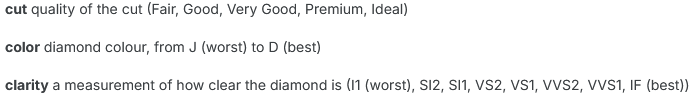

In [614]:
cut_mapping = {"Ideal":1, "Premium":2, "Very Good":3, "Good":4, "Fair":5}
color_mapping = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}
clarity_mapping = {"IF":1, "VVS1":2, "VVS2":3, "VS1":4, "VS2":5, "SI1":6, "SI2":7, "I1":8}

X_encoded = X.copy()
X_encoded["cut"] = X["cut"].map(cut_mapping)
X_encoded["color"] = X["color"].map(color_mapping)
X_encoded["clarity"] = X["clarity"].map(clarity_mapping)

In [615]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)
print(X_train.shape[0], X_test.shape[0])

43152 10788


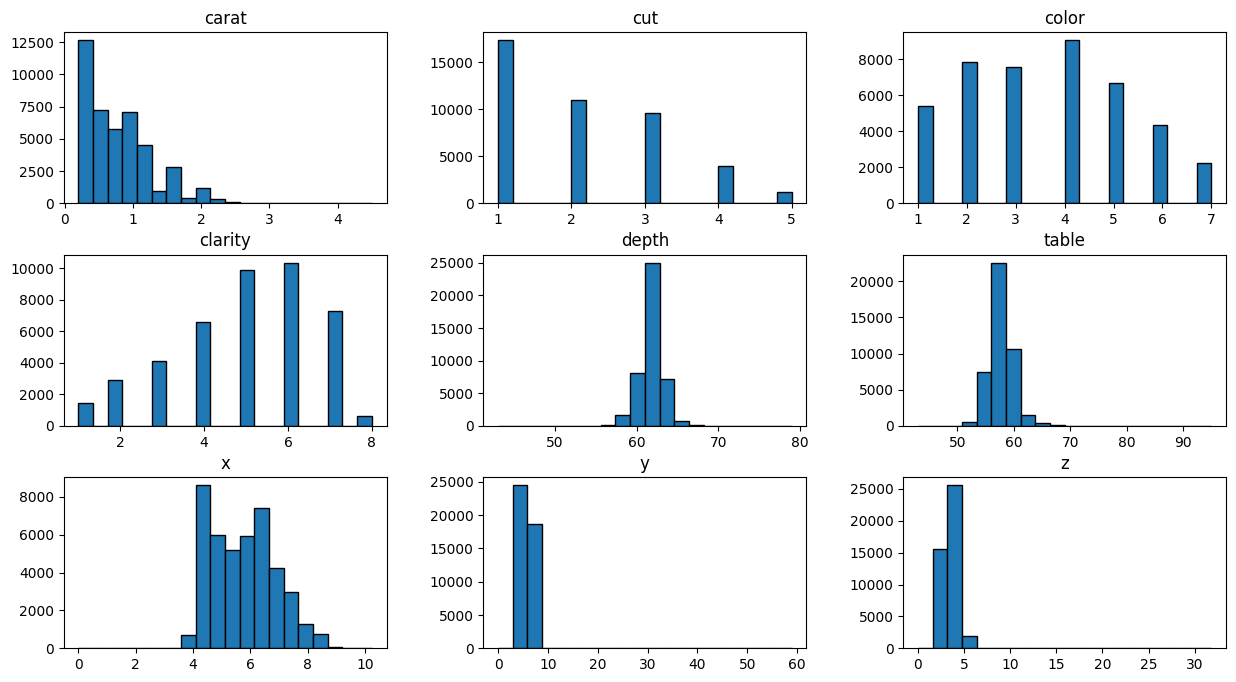

In [616]:
import matplotlib.pyplot as plt
X_train.hist(figsize=(15,8), edgecolor="black", grid=False, bins=20)
plt.show()

Tratar valores numéricos! (Feature Scaling), vou testar a normalidade:

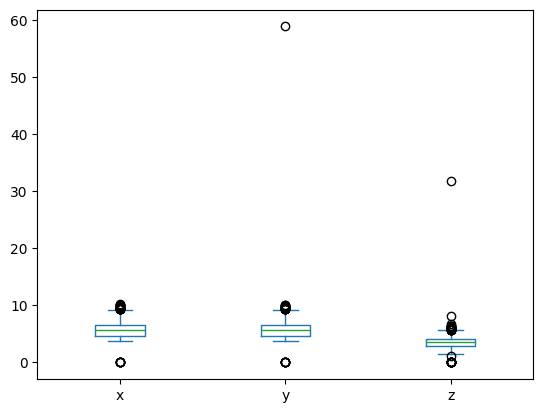

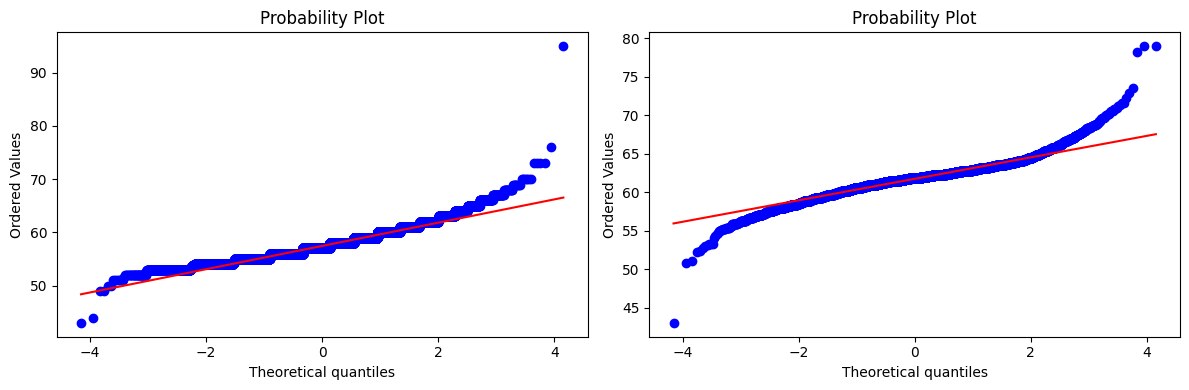

In [617]:
X_train[["x","y","z"]].plot(kind="box") # checar outliers

import scipy.stats as stats

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
stats.probplot(X_train["table"], dist="norm", plot=plt)
plt.subplot(1,2,2)
stats.probplot(X_train["depth"], dist="norm", plot=plt)

plt.tight_layout()
plt.show()

Enfim, nenhum atributo parece seguir uma normal.
- carat, y, z podem ser Log Transformed
- x,table,depth precisam ser Robust Scaled

In [618]:
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train[["table", "depth"]])

def feature_scaling(data):
  data_scaled = data.copy()
  data_scaled["carat"] = np.log1p(data["carat"])
  data_scaled[["table","depth"]] = standard_scaler.transform(data[["table", "depth"]])
  return data_scaled

X_train_scaled = feature_scaling(X_train)
X_test_scaled = feature_scaling(X_test)

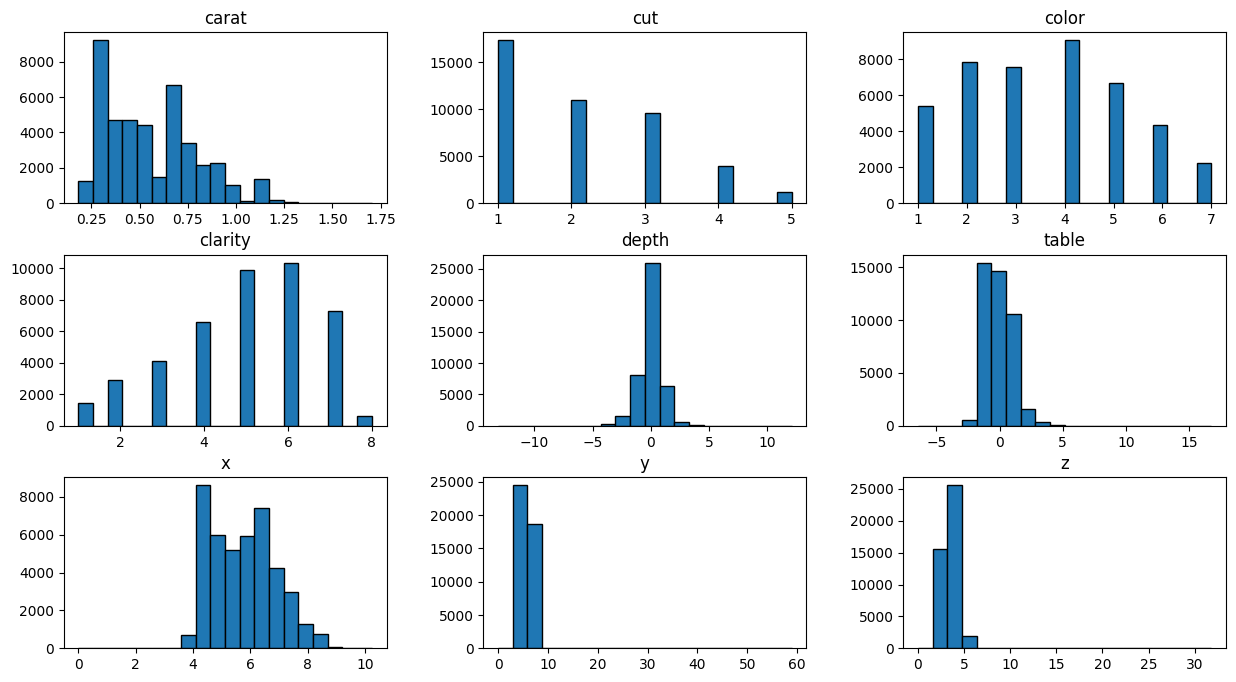

In [619]:
import matplotlib.pyplot as plt
X_train_scaled.hist(figsize=(15,8), edgecolor="black", grid=False, bins=20)
plt.show()

Ok! Atributos categoricos codificados e atributos numericos escalados.

In [620]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instanciando os modelos
linreg = LinearRegression()
knnr = KNeighborsRegressor()
gradr = GradientBoostingRegressor()

linreg_not = LinearRegression()
knnr_not = KNeighborsRegressor()
gradr_not = GradientBoostingRegressor()

# Treinando os modelos com dados escalados
linreg.fit(X_train_scaled, y_train)
knnr.fit(X_train_scaled, y_train)
gradr.fit(X_train_scaled, y_train)

# Treinando os modelos sem dados escalados
linreg_not.fit(X_train, y_train)
knnr_not.fit(X_train, y_train)
gradr_not.fit(X_train, y_train)


GradientBoostingRegressor()

In [621]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Usando RMSE como sqrt do MSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Predict
y_pred_lin = linreg.predict(X_test_scaled)
y_pred_knn = knnr.predict(X_test_scaled)
y_pred_grad = gradr.predict(X_test_scaled)

y_pred_lin_not = linreg_not.predict(X_test)
y_pred_knn_not = knnr_not.predict(X_test)
y_pred_grad_not = gradr_not.predict(X_test)

# Evaluate (RMSE e R²)
rmse_lin = root_mean_squared_error(y_test, y_pred_lin)
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
rmse_grad = root_mean_squared_error(y_test, y_pred_grad)

r2_lin = r2_score(y_test, y_pred_lin)
r2_knn = r2_score(y_test, y_pred_knn)
r2_grad = r2_score(y_test, y_pred_grad)

rmse_lin_not = root_mean_squared_error(y_test, y_pred_lin_not)
rmse_knn_not = root_mean_squared_error(y_test, y_pred_knn_not)
rmse_grad_not = root_mean_squared_error(y_test, y_pred_grad_not)

r2_lin_not = r2_score(y_test, y_pred_lin_not)
r2_knn_not = r2_score(y_test, y_pred_knn_not)
r2_grad_not = r2_score(y_test, y_pred_grad_not)

# Resultados
print("Linear Regression\n", "RMSE:", rmse_lin, "R²:", r2_lin)
print("KNeighbors Regressor\n", "RMSE:", rmse_knn, "R²:", r2_knn)
print("Gradient Boosting\n", "RMSE:", rmse_grad, "R²:", r2_grad)

print("\nLinear Regression (not scaled)\n", "RMSE:", rmse_lin_not, "R²:", r2_lin_not)
print("KNeighbors Regressor (not scaled)\n", "RMSE:", rmse_knn_not, "R²:", r2_knn_not)
print("Gradient Boosting (not scaled)\n", "RMSE:", rmse_grad_not, "R²:", r2_grad_not)


Linear Regression
 RMSE: 1353.0542808382165 R²: 0.8844490584612184
KNeighbors Regressor
 RMSE: 773.8814836485939 R²: 0.9621999860203773
Gradient Boosting
 RMSE: 612.518752068275 R²: 0.9763199929515022

Linear Regression (not scaled)
 RMSE: 1205.5101038488237 R²: 0.9082756255277905
KNeighbors Regressor (not scaled)
 RMSE: 854.7017445949028 R²: 0.953892430439904
Gradient Boosting (not scaled)
 RMSE: 612.7838279110737 R²: 0.9762994928246641


Como sabemos que o Target é uma combinação linear das outras features, vimos uma boa performance no KNN e no Logistic Regression.

Grad BOOST nao é afetado pelo scaling das features!

#(3) Conjuntos desbalanceados - parte I (1,5 pts)

Nesta parte do trabalho, você deve usar o arquivo A652.pickle. Este arquivo contém conjuntos de treino, validação e testes da fonte de dados correspondente.

In [622]:
import numpy as np
import pickle

f = open("A652.pickle", "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(f)
print(f"Shapes: ", X_train.shape, X_val.shape, X_test.shape)

Shapes:  (10012, 24) (2506, 24) (9582, 24)


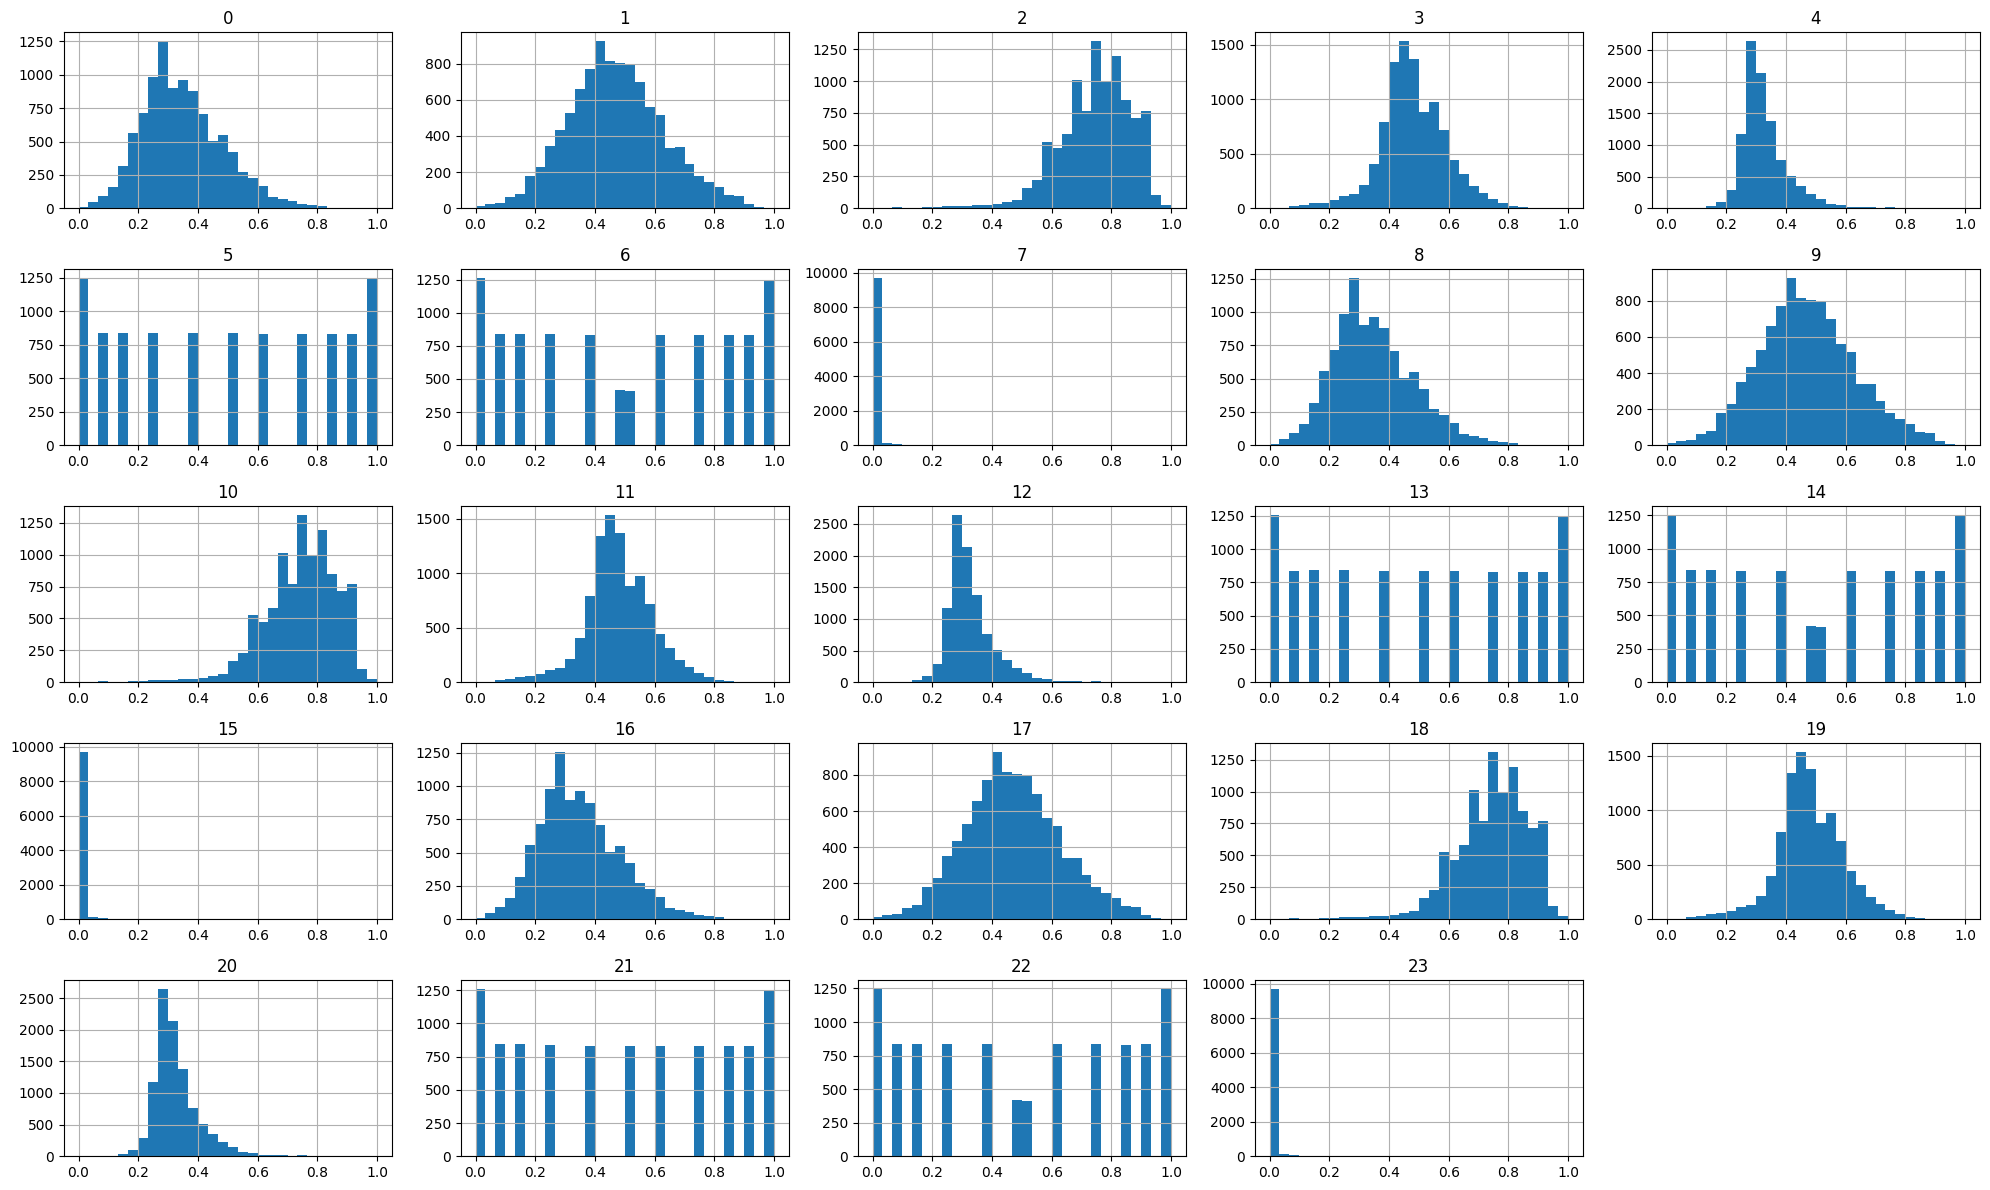

In [623]:
X_train_df = pd.DataFrame(X_train)
X_train_df.hist(figsize=(20,12), bins=30)
plt.tight_layout()
plt.show()

O atributo alvo corresponde a valores de precipitação (chuva). Você vai notar ao inspecionar as matrizes y_* de cada fonte que esses são conjuntos de dados para um problema de regressão (porque o alvo é um valor contínuo). Entretanto, nesta parte do trabalho, você deve alterar o alvo para gerar conjuntos de dados para classificação binária. Para isso, faça o seguinte, para cada arquivo fornecido. Se o alvo for igual a 0, altere para o rótulo 0; em caso contrário, altere para o rótulo 1.

Após realizar essa transformação, você deve notar que os conjuntos de dados resultantes são extremamente desbalanceados. Após realizar a transformação descrita acima, você deve investigar se a aplicação de alguma técnica de balanceamento de dados é efetiva no sentido de produzir um modelo de classificação que tenha maior desempenho preditivo. Ou seja, você vai comparar se um modelo treinado sem aplicar balanceamento é pior ou melhor (do ponto de vista preditivo) do que um modelo treinado após a aplicação de alguma técnica de balanceamento.

Você deve obrigatoriamente testar as três alternativas de solução descritas em aula (undersampling, oversampling e alteração de limiar), mas está livre para testar outras, se quiser. Faça essa investigação utilizando um único algoritmo de aprendizado, a saber, o sklearn.ensemble.GradientBoostingClassifier. Em sua análise dos resultados, forneça as matrizes de confusão obtidas, assim como os relatórios de classificação obtidos por meio da função classification_report do Scikit-Learn.


In [624]:
# Regressão -> Classificação Binária
# se y = 0 -> 0. se y != 0 -> 1.

# transformação
y_train = y_train.flatten() # just to transform into a simple array
y_test = y_test.flatten()
y_val = y_val.flatten()

y_train_bin = (y_train != 0).astype(int)
y_val_bin = (y_val != 0).astype(int)
y_test_bin = (y_test != 0).astype(int)

# analise
unique, counts_train = np.unique(y_train_bin, return_counts=True)
unique, counts_val = np.unique(y_val_bin, return_counts=True)
unique, counts_test = np.unique(y_test_bin, return_counts=True)

print(counts_train)
print(counts_val)
print(counts_test)

[9258  754]
[2277  229]
[8769  813]


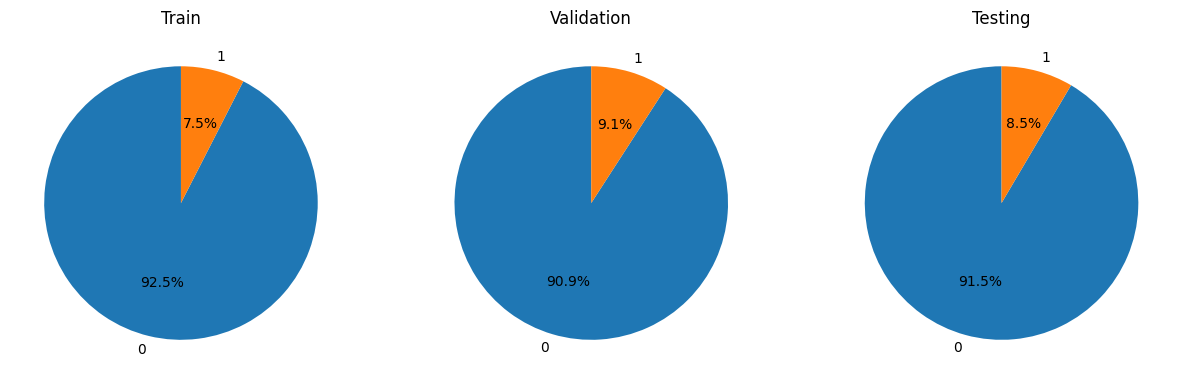

In [625]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(counts_train, labels=(0,1), autopct='%1.1f%%', startangle=90)
axes[0].set_title("Train")
axes[1].pie(counts_val, labels=(0,1), autopct='%1.1f%%', startangle=90)
axes[1].set_title("Validation")
axes[2].pie(counts_test, labels=(0,1), autopct='%1.1f%%', startangle=90)
axes[2].set_title("Testing")

plt.show()

Dataset bem desbalanceado, cerca de 7,5% é ocorrência de chuva.

Vamos tentar "Balancear" o dataset utilizando undersampling, oversampling assim como fazer alterações no limiar de classificação do modelo para fins de comparação.

In [626]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# UNDERSAMPLE: tirar dados da classe negativa
rus = RandomUnderSampler()
X_train_under, y_train_bin_under = rus.fit_resample(X_train, y_train_bin)

# OVERSAMPLE: aumentar dados da classe positiva => SMOTE
sm = SMOTE()
X_train_over, y_train_bin_over = sm.fit_resample(X_train, y_train_bin)

In [627]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb_under = GradientBoostingClassifier()
gb_over = GradientBoostingClassifier()

gb.fit(X_train, y_train_bin)
gb_under.fit(X_train_under, y_train_bin_under)
gb_over.fit(X_train_over, y_train_bin_over)

GradientBoostingClassifier()

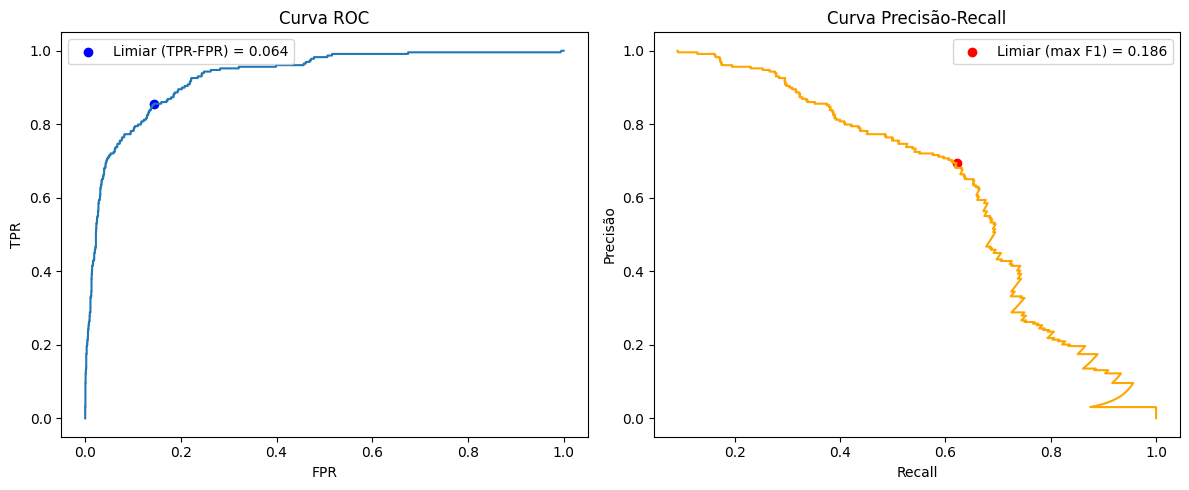

In [628]:
from sklearn.metrics import roc_curve, precision_recall_curve

y_pred_val = gb.predict_proba(X_val)[:,1]

# J de Yowden => TPR-FPR
FPR, TPR, thresholds = roc_curve(y_val_bin, y_pred_val)
J_scores = TPR-FPR
idx = J_scores.argmax()
best_tr = thresholds[idx]
best_fpr = FPR[idx]
best_tpr = TPR[idx]

# max F1_score
precisions, recalls, thresholds2 = precision_recall_curve(y_val_bin, y_pred_val)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
idx2 = np.argmax(f1_scores)
best_tr2 = thresholds2[idx2]
best_precision = precisions[idx2]
best_recall = recalls[idx2]

# plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC
ax[0].plot(FPR, TPR)
ax[0].scatter(best_fpr, best_tpr, label=f'Limiar (TPR-FPR) = {best_tr:.3f}', color='blue')
ax[0].set_title('Curva ROC')
ax[0].set_xlabel('FPR')
ax[0].set_ylabel('TPR')
ax[0].legend()

# Precision-Recall
ax[1].plot(precisions, recalls, color='orange')
ax[1].scatter(best_precision, best_recall, label=f'Limiar (max F1) = {best_tr2:.3f}', color='red')
ax[1].set_title('Curva Precisão-Recall')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precisão')
ax[1].legend()

plt.tight_layout()
plt.show()

Nesse contexto, faz mais sentido utilizar o J de Yowden, já que prever corretamente a classe positiva é de certa forma mais importante.

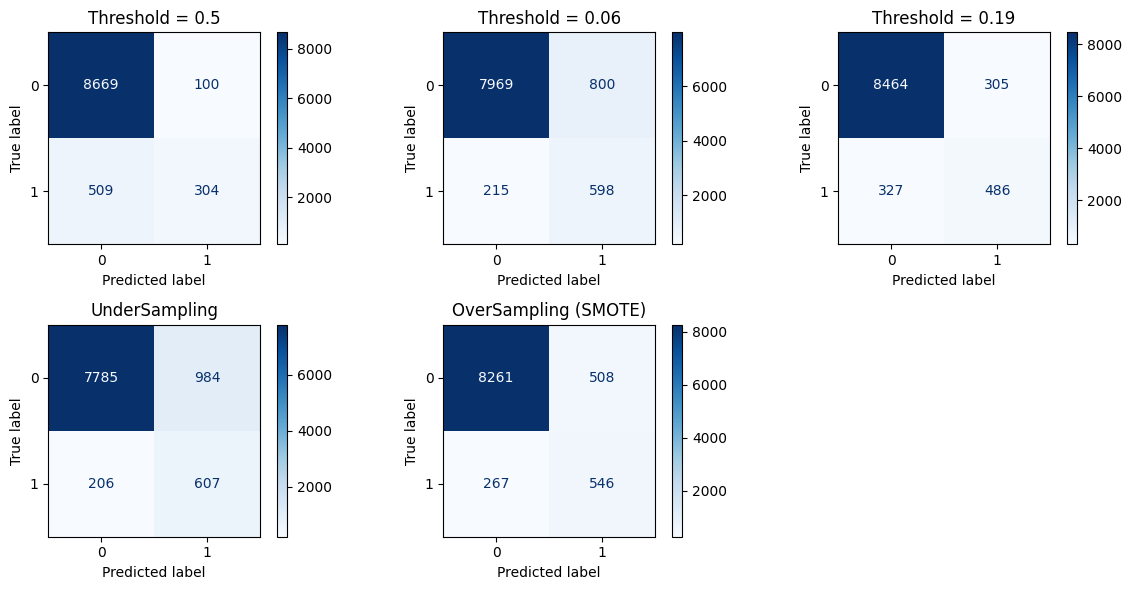

In [629]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_default = gb.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > best_tr).astype(int)
y_pred_2 = (y_pred_prob > best_tr2).astype(int)

y_pred_under = gb_under.predict(X_test)
y_pred_over = gb_over.predict(X_test)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(y_test_bin, y_pred_default)).plot(ax=axes[0][0], cmap='Blues')
ConfusionMatrixDisplay(confusion_matrix(y_test_bin, y_pred)).plot(ax=axes[0][1], cmap='Blues')
ConfusionMatrixDisplay(confusion_matrix(y_test_bin, y_pred_2)).plot(ax=axes[0][2], cmap='Blues')
ConfusionMatrixDisplay(confusion_matrix(y_test_bin, y_pred_under)).plot(ax=axes[1][0], cmap='Blues')
ConfusionMatrixDisplay(confusion_matrix(y_test_bin, y_pred_over)).plot(ax=axes[1][1], cmap='Blues')

axes[0][0].set_title('Threshold = 0.5')
axes[0][1].set_title(f'Threshold = {best_tr:.2f}')
axes[0][2].set_title(f'Threshold = {best_tr2:.2f}')
axes[1][0].set_title("UnderSampling")
axes[1][1].set_title('OverSampling (SMOTE)')

fig.delaxes(axes[1][2])
plt.tight_layout()
plt.show()

Em todos os casos melhoramos o TPR, o que mostra a necessidade dessas técnicas.

- Threshold = 0.06 : Maior TPR, poucos falsos negativos. Mas, muitos falsos positivos (805)

- Threshold = 0.19 : Um equilíbrio razoável.

- Undersampling : Melhora recall (580 TP), mas muitos FP (872).

- Oversampling (SMOTE) : Melhora recall (545 TP), menos FP que undersampling (509).

No nosso caso, prever que um dia não irá chover quando vai é mais impactante que prever que irá chover quando não vai.

Acredito que o J de Youden faça mais sentido, queremos um recall maior.

In [630]:
from sklearn.metrics import classification_report

# reporte de classificacao:
print("Threshold = 0.5: \n", classification_report(y_test_bin, y_pred_default))
print(f"Threshold = {best_tr:.2f}: \n", classification_report(y_test_bin, y_pred))
print(f"Threshold = {best_tr2:.2f}: \n", classification_report(y_test_bin, y_pred_2))
print("\nUnderSampling: \n", classification_report(y_test_bin, y_pred_under))
print("OverSampling (SMOTE): \n", classification_report(y_test_bin, y_pred_over))

Threshold = 0.5: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      8769
           1       0.75      0.37      0.50       813

    accuracy                           0.94      9582
   macro avg       0.85      0.68      0.73      9582
weighted avg       0.93      0.94      0.93      9582

Threshold = 0.06: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      8769
           1       0.43      0.74      0.54       813

    accuracy                           0.89      9582
   macro avg       0.70      0.82      0.74      9582
weighted avg       0.93      0.89      0.91      9582

Threshold = 0.19: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      8769
           1       0.61      0.60      0.61       813

    accuracy                           0.93      9582
   macro avg       0.79      0.78      0.78      9582
weighted avg   

Com as 3 técnicas conseguimos um aumento no f1_score, ou seja, prevemos melhor a classe positiva (o dia que chove).

- Threshold 0.5 (padrão): F1-score da classe "chuva"(1) = 0.50
- Threshold 0.06: F1-score da classe "chuva"(1) = 0.54
- Threshold 0.19: F1-score da classe "chuva"(1) = 0.60
- UnderSampling: F1-score da classe "chuva"(1) = 0.51
- OverSampling (SMOTE): F1-score da classe "chuva"(1) = 0.58

Diante do desbalanceamento natural dos dados de chuva, ajustar o limiar de decisão do modelo mostrou-se mais eficaz do que aplicar técnicas de undersampling ou oversampling.

Ao mudar o threshold para valores como 0.06 ou 0.19, foi possível melhorar significativamente o desempenho na detecção da classe minoritária (dias de chuva), especialmente no F1-score, sem a necessidade de alterar a distribuição original dos dados.

Além de ser uma solução mais simples e eficiente, evita os potenciais problemas de perda de representatividade dos dados associados às técnicas de reamostragem.

#(4) Conjuntos desbalanceados - parte II (2 pts)

Na parte 3, você enquadrou o problema de prever precipitação como uma tarefa de classificação binária. Nesta parte, você irá implementar um procedimento para criar um modelo de regressão para precipitação. Você deve usar o conjunto de dados fornecido no arquivo A652.pickle.

Você vai notar ao inspecionar as matrizes y_train, y_val, y_test, que elas apresentam valores contínuos não-negativos. Esses são valores de precipitação (chuva) medidos em mm/h. Você vai notar também que a grande maioria dos valores é igual a zero, o que corresponde a uma medição para a variável precipitação feita em um instante de tempo em que não está chovendo.

O procedimento para criar o modelo de regressão a ser usado nessa parte é descrito a seguir. Inicialmente você deve criar versões binárias das matrizes alvo y_train, y_val, y_test. Concretamente, para cada matriz alvo (y_train, y_val, y_test), substitua todos os valores diferentes de zero por 1 e os valores restantes por 0. Ao fazer isso, você terá gerado matrizes resposta binárias. Chame essas matrizes de y_train_bin, y_val_bin, y_test_bin, respectivamente. Em seguida, execute os passos listados abaixo.

1. Treine um modelo de classificação binária usando (X_train, y_train_bin) como conjunto de treinamento. Chame esse modelo de C.
2. Aplique C a todos os exemplos de X_train.
3. Defina X_train_1 como o subconjunto de X_train que foi classificado por C como sendo da classe 1. Defina também y_train_1 como o subconjunto de y_train correspondente a X_train_1.
4. Treine um modelo de regressão usando (X_train_1, y_train_1) como conjunto de treinamento. Chame esse modelo de R.

5. Para obter R′(x), i.e., a previsão de precipitação para um novo exemplo x, inicialmente compute C(x). Em seguida, use o valor computado para computar R′
(x) da seguinte forma:

  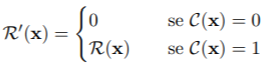

Você está livre para escolher os algoritmos que quiser para construir o classificador C e o regressor R mencionados no procedimento descrito acima. Reporte os resultados desse experimento para o conjunto de testes fornecido (X_test).

Compare seu modelo de regressão produzido por meio desse procedimento com o modelo treinado usando (X_train, y_train) como conjunto de treinamento. Esse procedimento produziu um melhor modelo do ponto de vista preditivo? Como métrica de avaliação, use RMSE. Reporte valores dessa métrica para cada nível de severidade de precipitação, conforme a Tabela 2.

  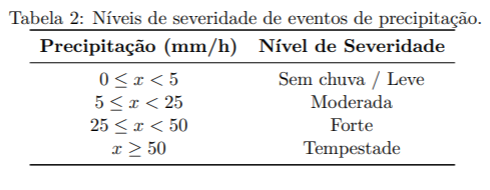

In [631]:
# 1. utilizando o mesmo modelo da questao 3
C = GradientBoostingClassifier()
C.fit(X_train, y_train_bin)

# 2. predizendo com o threshold escolhido anteriormente, de acordo com o J de Yowden.
threshold = best_tr
y_pred_prob_train = C.predict_proba(X_train)
y_pred_train_bin = (y_pred_prob_train > threshold).astype(int)[:,1]

# 3. datasets somente da classe positiva "dias de chuva"
X_train_1 = X_train[y_pred_train_bin == 1]
y_train_1 = y_train_bin[y_pred_train_bin == 1]

In [632]:
# queremos prever QUANTO de chuva.
from sklearn.ensemble import GradientBoostingRegressor

# 4. treinando modelo de regressão
R = GradientBoostingRegressor()
R.fit(X_train_1, y_train_1)

# 5. Se C(x) = 0 -> R'(x) = 0, Se C(x) = 1 -> R'(x) = R(x)
y_pred_prob_c = C.predict_proba(X_test)[:,1]
y_pred_c = (y_pred_prob_c > threshold).astype(int)

# prevendo a quantidade de chuva
X_test_1 = X_test[y_pred_c == 1]
y_pred_1 = R.predict(X_test_1)

# 0 para C(x) = 0 e R(x) para C(x) = 1
y_pred = np.zeros(len(X_test))
y_pred[y_pred_c == 1] = y_pred_1

Comparar com o modelo simples sem passar pelo Classificador Binário antes.

In [633]:
R_simples = GradientBoostingRegressor()
R_simples.fit(X_train, y_train)
y_simples_pred = R_simples.predict(X_test)

In [634]:
from sklearn.metrics import root_mean_squared_error

def categorizar_severidade(y):
    categorias = np.empty_like(y, dtype=object)
    categorias[y < 5] = "Sem chuva / Leve"
    categorias[(y >= 5) & (y < 25)] = "Moderada"
    categorias[(y >= 25) & (y < 50)] = "Forte"
    categorias[y >= 50] = "Tempestade"
    return categorias

# categorizar as predicoes
categorias = categorizar_severidade(y_test)
labels = ["Sem chuva / Leve", "Moderada", "Forte", "Tempestade"]

def calcula_rmse_classes(y_pred):
  print(f"RMSE geral: {root_mean_squared_error(y_test, y_pred):.3f}")

  for label in labels:
    y_test_label = y_test[categorias == label]
    y_pred_label = y_pred[categorias == label]

    if len(y_test_label) == 0:
      print(f"Sem amostras para categoria: {label}")
    else:
      erro = root_mean_squared_error(y_test_label, y_pred_label)
      print(f"{label}: RMSE = {erro:.3f}")

print("Classificador Binário + Regressor: \n")
calcula_rmse_classes(y_pred)

print("\nSomente Regressor: \n")
calcula_rmse_classes(y_simples_pred)

Classificador Binário + Regressor: 

RMSE geral: 1.378
Sem chuva / Leve: RMSE = 0.387
Moderada: RMSE = 10.121
Forte: RMSE = 31.093
Tempestade: RMSE = 61.929

Somente Regressor: 

RMSE geral: 1.337
Sem chuva / Leve: RMSE = 0.487
Moderada: RMSE = 9.662
Forte: RMSE = 25.924
Tempestade: RMSE = 60.863


O modelo simples teve o RMSE geral ligeiramente menor, indicando um desempenho globalmente melhor.

No entanto, o modelo híbrido teve melhor desempenho em classificar "Sem chuva / Leve".

Nas demais categorias (Moderada, Forte, Tempestade), o modelo simples superou o híbrido, com RMSEs consistentemente mais baixos.

O modelo simples (regressor direto) apresentou melhor desempenho preditivo na maioria das categorias e no RMSE geral.

Portanto, esse procedimento não produziu um modelo melhor do ponto de vista preditivo, embora o modelo híbrido tenha se destacado levemente apenas na categoria de baixa precipitação.

Dividir tudo em "choveu/não choveu" não captura bem a nuance dos dados, que são contínuos.

O regressor simples pode simplesmente aprender a relação entre os atributos e a chuva de forma mais fluida, sem precisar de uma divisão artificial do problema.

Talvez um classificador **multiclasse** que tente classificar (Sem chuva / Moderada / Forte / Tempestade ) pode ser mais interessante, e depois o regressor diria com mais precisão quanto de chuva.

# (5) Calibração de Modelos (1,5 pts)

Considere novamente o conjunto de dados fornecido na parte 1. No domínio do problema em questão, é importante que as probabilidades de predição do modelo estejam corretamente calibradas. Sua tarefa nesta parte é produzir versões calibradas dos modelos originais criados na parte 1.

Investigue o grau de calibração dos modelos originais e, conforme for o caso, aplique alguma técnica para calibrar os resultados do modelo. Você está livre para usar qualquer das técnicas de calibração que abordamos em aula, ou mesmo outra técnica que encontrar na literatura. Apresente gráficos para ilustrar os graus de calibração dos modelos antes e após aplicar a calibração. Apresente uma análise dos resultados obtidos.

In [635]:
# Preparação dos dados
X_val = df_val_scaled.drop("CLASSE", axis=1)
y_val = df_val_scaled["CLASSE"]
X_test = df_test_scaled.drop("CLASSE", axis=1)
y_test = df_test_scaled["CLASSE"]

# Calibração dos modelos
y_pred_prob_log = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_knnc = knnc.predict_proba(X_test)[:, 1]
y_pred_prob_gradc = gradc.predict_proba(X_test)[:, 1]

import warnings
warnings.filterwarnings("ignore", message=".*cv='prefit'.*")

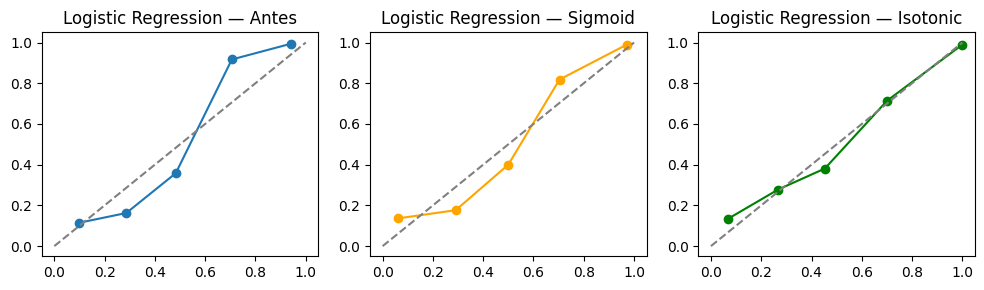

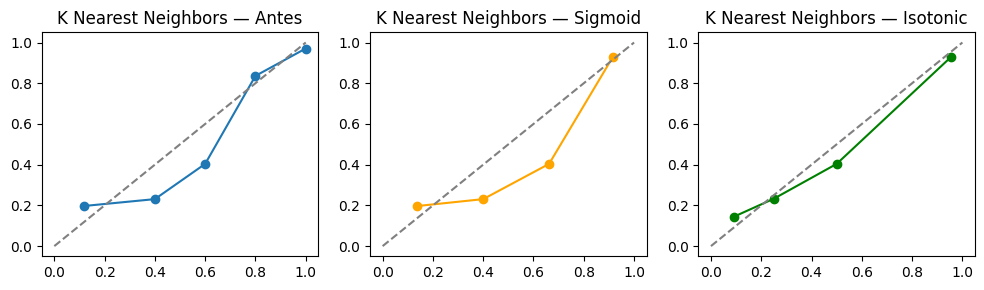

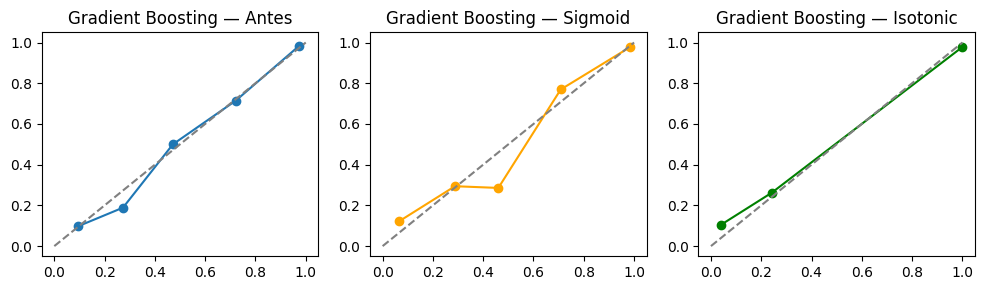

In [639]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Função para calibrar o modelo e plotar curvas de calibração
def calibrate_model(model, y_pred_prob, name):
  # ANTES da calibração
  prob_true, prob_pred = calibration_curve(y_test, y_pred_prob)

  # SIGMOID
  sigmoid = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
  sigmoid.fit(X_val, y_val)
  y_prob_sig = sigmoid.predict_proba(X_test)[:,1]
  prob_true_sig, prob_pred_sig = calibration_curve(y_test, y_prob_sig)

  # ISOTONIC
  isotonic = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
  isotonic.fit(X_val, y_val)
  y_prob_iso = isotonic.predict_proba(X_test)[:,1]
  prob_true_iso, prob_pred_iso = calibration_curve(y_test, y_prob_iso)

  # Plots
  fig, axes = plt.subplots(1, 3, figsize=(10, 3))

  # antes da calibração
  axes[0].plot(prob_pred, prob_true, marker='o')
  axes[0].plot([0,1],[0,1], '--', color='gray')
  axes[0].set_title(f"{name} — Antes")

  # sigmoid
  axes[1].plot(prob_pred_sig, prob_true_sig, marker='o', color='orange')
  axes[1].plot([0,1],[0,1], '--', color='gray')
  axes[1].set_title(f"{name} — Sigmoid")

  # isotonic
  axes[2].plot(prob_pred_iso, prob_true_iso, marker='o', color='green')
  axes[2].plot([0,1],[0,1], '--', color='gray')
  axes[2].set_title(f"{name} — Isotonic")

  plt.tight_layout()
  plt.show()

  # ECE (Expected Calibration Error)
  bin_size = len(y_test) // 10
  ece = np.sum(np.abs(prob_true - prob_pred) * bin_size) / len(y_test)
  ece_s = np.sum(np.abs(prob_true_sig - prob_pred_sig) * bin_size) / len(y_test)
  ece_i = np.sum(np.abs(prob_true_iso - prob_pred_iso) * bin_size) / len(y_test)

  return (ece, ece_s, ece_i)

# Executa a calibração e coleta os ECEs para cada modelo
ece_log, ece_s_log, ece_i_log = calibrate_model(logreg, y_pred_prob_log, "Logistic Regression")
ece_knnc, ece_s_knnc, ece_i_knnc = calibrate_model(knnc, y_pred_prob_knnc, "K Nearest Neighbors")
ece_gradc, ece_s_gradc, ece_i_gradc = calibrate_model(gradc, y_pred_prob_gradc, "Gradient Boosting")


In [637]:
from sklearn.metrics import brier_score_loss
print(ece_log, ece_s_log, ece_i_log)
print(ece_knnc, ece_s_knnc, ece_i_knnc)
print(ece_gradc, ece_s_gradc, ece_i_gradc)

0.11822401242328759 0.09363853323328285 0.08116172839688923
0.06032257371112784 0.05854163120763461 0.03178124486882569
0.09025987027044342 0.13848300566452806 0.05177869782223725


A calibracao com o metodo isotonico parece ter sido melhor, talvez isso se deva por

#(6) Validação cruzada aninhada (1,0 pts)


Considere novamente o conjunto de dados Diamond apresentado na parte 2. Nessa parte
do trabalho você deve realizar a validação cruzada aninhada (nested cross-validation) para
encontrar (1) uma boa combinação de hiperparâmetros para ajustar um modelo e (2) um
bom modelo para esse conjunto de dados. Como algoritmos de aprendizado candidatos, você
deve escolher dois dos listados na parte 1. Estude a documentação do Scikit Learn relativa
ao algoritmo que você escolher, para selecionar quais hiperparâmetros irá explorar. Você
também é livre para escolher entre duas estratégias de busca de hiperparâmetros, Grid Search
ou Random Search. Apresente uma análise dos resultados encontrados.

In [666]:
import pandas as pd
diamonds = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv")

X = diamonds.drop(columns=["price"])
y = diamonds["price"]

cut_mapping = {"Ideal":1, "Premium":2, "Very Good":3, "Good":4, "Fair":5}
color_mapping = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}
clarity_mapping = {"IF":1, "VVS1":2, "VVS2":3, "VS1":4, "VS2":5, "SI1":6, "SI2":7, "I1":8}

X["cut"] = X["cut"].map(cut_mapping)
X["color"] = X["color"].map(color_mapping)
X["clarity"] = X["clarity"].map(clarity_mapping)

scaler = StandardScaler()
scaler.fit(X[["table", "depth"]])

X["carat"] = np.log1p(X["carat"])
X[["table","depth"]] = scaler.transform(X[["table", "depth"]])

X_sample = X.sample(frac=0.3)
y_sample = y.loc[X_sample.index]

Quais serão os hiperparâmetros a serem otimizados?

KNeighborsRegressor:
- n_neighbors (k) [3,5,7.9]
- weights ['uniform','distance']
- p [1,2] (distancia manhatan ou euclidiana)

GradientBoostingRegressor
- n_estimators [100,200]
- max_depth [3,5,7]
- learning_rate [0.01, 0.1, 0.2]

In [669]:
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()
knnr_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

gradr = GradientBoostingRegressor()
gradr_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Nested CV
outer_cv = KFold(n_splits=5, shuffle=True)
inner_cv = KFold(n_splits=3, shuffle=True)

knnr_search = RandomizedSearchCV(knnr, knnr_params, cv=inner_cv, scoring='r2')
knnr_scores = cross_val_score(knnr_search, X_sample, y_sample, cv=outer_cv, scoring='r2')

print("KNN R² scores (outer folds):", knnr_scores)
print("KNN Média R²:", np.mean(knnr_scores))

# Nested CV for GBR
gradr_search = RandomizedSearchCV(gradr, gradr_params, cv=inner_cv, scoring='r2')
gradr_scores = cross_val_score(gradr_search, X_sample, y_sample, cv=outer_cv, scoring='r2')

print("\nGBR R² scores (outer folds):", gradr_scores)
print("GBR Média R²:", np.mean(gradr_scores))

KNN R² scores (outer folds): [0.95924649 0.96622089 0.9711811  0.97030217 0.96668891]
KNN Média R²: 0.9667279101496918

GBR R² scores (outer folds): [0.97734202 0.97841372 0.98106189 0.98027866 0.98022041]
GBR Média R²: 0.9794633423928184


In [673]:
gradr_search.fit(X_sample, y_sample)
best_model = gradr_search.best_estimator_
best_params = gradr_search.best_params_

print(best_model, best_params)

GradientBoostingRegressor(max_depth=5) {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


In [676]:
y_pred = best_model.predict(X_sample)
rmse = root_mean_squared_error(y_sample, y_pred)
print(f"RMSE: {rmse}")

RMSE: 435.28333650678286


Durante a validação cruzada aninhada, comparei os modelos KNN e Gradient Boosting Regressor utilizando RandomizedSearchCV para ajuste de hiperparâmetros.

Observou-se que o Gradient Boosting teve um desempenho consistentemente superior, com média de R² = 0.979, contra R² = 0.966 do KNN.

Isso indica que o modelo de boosting é mais eficaz, provavelmente devido à sua maior capacidade de modelar relações não-lineares.

Além disso, os hiperparâmetros ótimos encontrados para o GBR foram: n_estimators = 100, max_depth = 5 e learning_rate = 0.1